In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


google translator

In [3]:
pip install googletrans==3.1.0a0

     |████████████████████████████████| 61kB 3.6MB/s 
     |████████████████████████████████| 51kB 9.8MB/s 
     |████████████████████████████████| 1.0MB 8.6MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
     |████████████████████████████████| 61kB 10.9MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp36-none-any.whl size=16368 sha256=44edc045cbfb10ba45babcbaa9e1ad18dffc14f5899b1f9bd4bd74a05c6024a8
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=94078c1edee31c3e8d0d6a846bb52491216d4fc9d208cec1bda40c3476881891
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [4]:
!pip install google_trans_new

In [5]:
from googletrans import Translator
       
translator = Translator()

In [6]:
import googletrans

print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [7]:
translations = translator.translate(['The quick brown fox', 'jumps over', 'the lazy dog'], dest='bn')

In [8]:


from google_trans_new import google_translator  
translator = google_translator()  
translate_text = translator.translate('สวัสดีจีน',lang_tgt='en')  
print(translate_text)

Hello china 


In [9]:
import os

import cv2
import random
import numpy as np
import random

SEED=1234
np.random.seed(SEED)

import torch
from torch.utils import data
import torch.nn as nn

In [10]:
import nltk
import pickle
import os.path
from nltk.tokenize import word_tokenize
nltk.download("punkt")
from collections import Counter

class Vocabulary(object):

    def __init__(self,
        vocab_threshold,
        captions,
        vocab_file='./vocab.pkl',
        start_word="<start>",
        end_word="<end>",
        unk_word="<unk>",
        annotations_file='../cocoapi/annotations/captions_train2014.json',
        vocab_from_file=False,
        tokenizer=nltk.tokenize.word_tokenize):
        """Initialize the vocabulary.
        Args:
          vocab_threshold: Minimum word count threshold.
          captions: list of captions 
          vocab_file: File containing the vocabulary.
          start_word: Special word denoting sentence start.
          end_word: Special word denoting sentence end.
          unk_word: Special word denoting unknown words.
          annotations_file: Path for train annotation file.
          vocab_from_file: If False, create vocab from scratch & override any existing vocab_file
                           If True, load vocab from from existing vocab_file, if it exists
        """
        self.vocab_threshold = vocab_threshold
        self.captions=captions
        self.vocab_file = vocab_file
        self.start_word = start_word
        self.end_word = end_word
        self.unk_word = unk_word
        self.annotations_file = annotations_file
        self.vocab_from_file = vocab_from_file
        self.tokenizer=tokenizer
        self.get_vocab()

    def get_vocab(self):
        """Load the vocabulary from file OR build the vocabulary from scratch."""
        if os.path.exists(self.vocab_file) & self.vocab_from_file:
            with open(self.vocab_file, 'rb') as f:
                vocab = pickle.load(f)
                self.word2idx = vocab.word2idx
                self.idx2word = vocab.idx2word
            print('Vocabulary successfully loaded from vocab.pkl file!')
        else:
            self.build_vocab()
            with open(self.vocab_file, 'wb') as f:
                pickle.dump(self, f)
        
    def build_vocab(self):
        """Populate the dictionaries for converting tokens to integers (and vice-versa)."""
        self.init_vocab()
#         self.add_word(self.start_word)
        self.add_word(self.end_word)
        self.add_word(self.unk_word)
        self.add_captions()

    def init_vocab(self):
        """Initialize the dictionaries for converting tokens to integers (and vice-versa)."""
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        """Add a token to the vocabulary."""
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def add_captions(self):
        """Loop over training captions and add all tokens to the vocabulary that meet or exceed the threshold."""
        counter = Counter()
        for i, caption in enumerate(self.captions):
            tokens = self.tokenizer(caption.lower())
            counter.update(tokens)

            if i % 1000 == 0:
                print("[%d/%d] Tokenizing captions..." % (i, len(self.captions)))

        words = [word for word, cnt in counter.items() if cnt >= self.vocab_threshold]

        for i, word in enumerate(words):
            self.add_word(word)

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx[self.unk_word]
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
import cv2
import os
import torch
from torch.utils import data
from torchvision import transforms
from nltk.tokenize import word_tokenize
import random
from PIL import Image
import numpy as np
class Dataset(data.Dataset):
    def __init__(self,images_folder,
                 data,
                 transform,
                 vocab,
                 imsize=(224,224),
                 shuffle=True,
                 tokenizer=word_tokenize
                ):
        """images_folder: images path
           data:  list of tuples containing the name of image and respective captions
           vocab: vocabulary object
           imsize: tuple, image size
           shuffle: bool, will we shuffle the data or not
           tokenizer: tokenizer object"""
        self.image_folder=images_folder
        if shuffle:
            random.shuffle(data)
        self.data=data
        self.transform=transform
        self.imsize=imsize
        self.vocab=vocab
        self.tokenizer=tokenizer
    def load_data(self,batch_size=32):
        images,captions=[None]*batch_size,[None]*batch_size
        for i in range(self.__len__()):
            image,caption=self.__getitem__(i)
            c,h,w=image.size()
            images[i%batch_size]=image.view(-1,c,h,w)
            captions[i%batch_size]=caption
            if i>0 and i%batch_size==0:
                yield images,captions

            
    def __getitem__(self,index):
        data =self.data[index]
        image_name=data[0]
        image=cv2.imread(os.path.join(self.image_folder,image_name))
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,self.imsize)
        image=self.transform(Image.fromarray(image))
        caption= data[1]
        tokens = self.tokenizer(str(caption).lower())
        caption = []
        caption.extend([self.vocab(token) for token in tokens])
        caption.append(self.vocab(self.vocab.end_word))
        caption = torch.Tensor(caption).long()
        return image,caption
        
    def __len__(self):
        return len(self.data)

In [12]:
dataset_folder="/content/drive/MyDrive/englishCaption/Flickr8k"

In [13]:
tokens=open("/content/drive/MyDrive/englishCaption/Flickr8k/Flickr8k.token.txt").read().split("\n")

for token in tokens:
    if token=='':
        tokens.remove(token)

train_images_text_file=dataset_folder+"Flickr_8k.trainImages.txt"
validation_images_text_file=dataset_folder+"Flickr_8k.devImages.txt"
test_images_text_file=dataset_folder+"Flickr_8k.testImages.txt"


train_images_text=open("/content/drive/MyDrive/englishCaption/Flickr8k/Flickr_8k.trainImages.txt","r").read()
validation_images_text=open("/content/drive/MyDrive/englishCaption/Flickr8k/Flickr_8k.devImages.txt","r").read()
test_images_text=open("/content/drive/MyDrive/englishCaption/Flickr8k/Flickr_8k.testImages.txt","r").read()

train_images_names=train_images_text.split("\n")
validation_images_names=validation_images_text.split("\n")
test_images_names=test_images_text.split("\n")

image_folder="/content/drive/MyDrive/englishCaption/Flickr8k/images"

image_names=[]
captions=[]
train_with_captions=[]
val_with_captions=[]
test_with_captions=[]
for token in tokens:
    image_name=token.split("\t")[0].split("#")[0]
    caption= token.split("\t")[1]
    image_names.append(image_name)
    captions.append(caption)
    if image_name in train_images_names:
        train_with_captions.append((image_name,caption))
    elif image_name in validation_images_names:
        val_with_captions.append((image_name,caption))
    elif image_name in test_images_names:
        test_with_captions.append((image_name,caption))

vocab=Vocabulary(vocab_threshold=6,captions=captions)

[0/40460] Tokenizing captions...
[1000/40460] Tokenizing captions...
[2000/40460] Tokenizing captions...
[3000/40460] Tokenizing captions...
[4000/40460] Tokenizing captions...
[5000/40460] Tokenizing captions...
[6000/40460] Tokenizing captions...
[7000/40460] Tokenizing captions...
[8000/40460] Tokenizing captions...
[9000/40460] Tokenizing captions...
[10000/40460] Tokenizing captions...
[11000/40460] Tokenizing captions...
[12000/40460] Tokenizing captions...
[13000/40460] Tokenizing captions...
[14000/40460] Tokenizing captions...
[15000/40460] Tokenizing captions...
[16000/40460] Tokenizing captions...
[17000/40460] Tokenizing captions...
[18000/40460] Tokenizing captions...
[19000/40460] Tokenizing captions...
[20000/40460] Tokenizing captions...
[21000/40460] Tokenizing captions...
[22000/40460] Tokenizing captions...
[23000/40460] Tokenizing captions...
[24000/40460] Tokenizing captions...
[25000/40460] Tokenizing captions...
[26000/40460] Tokenizing captions...
[27000/40460] 

In [14]:
# Define a transform to pre-process the training images.
transform_train = transforms.Compose([ 
    transforms.Resize(224),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
#     transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
#                          (0.229, 0.224, 0.225))
])

In [15]:
dataset= Dataset(image_folder,train_with_captions,transform_train,vocab)
valid_dataset= Dataset(image_folder,val_with_captions,transform_train,vocab)
test_dataset= Dataset(image_folder,test_with_captions,transform_train,vocab)

In [16]:
class EncoderVGG(nn.Module):
    def __init__(self):
        super(EncoderVGG, self).__init__()
        model = models.vgg16(pretrained=True)
        for param in model.parameters():
            param.requires_grad_(False)
        
        normal_modules = list(model.features.children())+list(model.avgpool.children())
        classifier_modules=list(model.classifier.children())[:-3]
        self.conv_model = nn.Sequential(*normal_modules)
        self.classifier_model=nn.Sequential(*classifier_modules)
#         self.embed = nn.Linear(resnet.fc.in_features, embed_size)

    def forward(self, images):
        features = self.conv_model(images)
        features = features.view(features.size(0),-1)
        features = self.classifier_model(features)
        return features

In [17]:
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size,batch_size):
        ''' Initialize the layers of this model.'''
        super().__init__()
        self.hidden_size = hidden_size    
        # Embedding layer that turns words into a vector of a specified size
        self.word_embeddings = nn.Embedding(vocab_size, embed_size)
        # The LSTM takes embedded word vectors (of a specified size) as input
        # and outputs hidden states of size hidden_dim
        self.lstm = nn.LSTM(input_size=embed_size, \
                            hidden_size=hidden_size, # LSTM hidden units 
                            num_layers=1, # number of LSTM layer
                            bias=True, # use bias weights b_ih and b_hh
                            batch_first=True,  # input & output will have batch size as 1st dimension
                            dropout=0, # Not applying dropout 
                            bidirectional=False, # unidirectional LSTM
                           )
        
        # The linear layer that maps the hidden state output dimension
        # to the number of words we want as output, vocab_size
        self.linear = nn.Linear(hidden_size, vocab_size)                     
        self.batch_size=batch_size
        # initialize the hidden state
        # self.hidden = self.init_hidden()
        
    def init_hidden(self, batch_size):
        """ At the start of training, we need to initialize a hidden state;
        there will be none because the hidden state is formed based on previously seen data.
        So, this function defines a hidden state with all zeroes
        The axes semantics are (num_layers, batch_size, hidden_dim)
        """
        return (torch.zeros((1, batch_size, self.hidden_size), device=device), \
                torch.zeros((1, batch_size, self.hidden_size), device=device))

    def forward(self, features, captions):
        """ Define the feedforward behavior of the model """
        
        # Discard the <end> word to avoid predicting when <end> is the input of the RNN
#         captions = captions[:, :-1]     
        input_captions=[caption[:-1] for caption in captions]


        input_captions=nn.utils.rnn.pad_sequence(input_captions,batch_first=True)
#         print(input_captions.size())
        input_captions_lengths=[len(input_caption)+1 for input_caption in input_captions]
        embeddings = self.word_embeddings(input_captions) # embeddings new shape : (batch_size, captions length - 1, embed_size)
        
        # Initialize the hidden state
        batch_size = features.shape[0] # features is of shape (batch_size, embed_size)
        self.hidden = self.init_hidden(self.batch_size) 
                
        # Create embedded word vectors for each word in the captions
        

        embeddings = torch.cat((features.unsqueeze(1), embeddings), dim=1) # embeddings new shape : (batch_size, caption length, embed_size)

        embeddings=nn.utils.rnn.pack_padded_sequence(embeddings,lengths=input_captions_lengths,batch_first=True,enforce_sorted=False)
        # Get the output and hidden state by passing the lstm over our word embeddings
        # the lstm takes in our embeddings and hidden state
        lstm_out, self.hidden = self.lstm(embeddings, self.hidden) # lstm_out shape : (batch_size, caption length, hidden_size)
        lstm_out=nn.utils.rnn.pad_packed_sequence(lstm_out,batch_first=True)

        #Fully connected layer
        outputs = self.linear(lstm_out[0]) # outputs shape : (batch_size, caption length, vocab_size)

        return outputs

In [18]:
from torchvision import models

In [19]:
batch_size = 128          # batch size
vocab_threshold = 6        # minimum word count threshold
vocab_from_file = True    # if True, load existing vocab file
embed_size = 4096      # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 6            # number of training epochs (1 for testing)
save_every = 1             # determines frequency of saving model weights
print_every = 200          # determines window for printing average loss
log_file = 'training_log.txt'       # name of file with saved training loss and perplexity
val_log_file = 'validation_log.txt'
vocab_size=len(vocab)

In [20]:
encoder = EncoderVGG()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size,batch_size)

# Move models to GPU if CUDA is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function. 
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


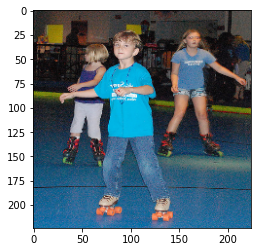

In [21]:
image=dataset[0][0]
image=image.data.numpy().transpose((1,2,0))
import matplotlib.pyplot as plt
plt.imshow(image)
params = list(decoder.parameters()) 
optimizer = torch.optim.Adam(params, lr=0.001, weight_decay=0.001)
validation_loss_min = np.inf
train_losses=[]
validation_losses=[]

In [22]:
encoder.load_state_dict(torch.load("/content/drive/MyDrive/englishCaption/encoder/encoder-1.pkl", map_location= torch.device('cpu')))#, map_location= torch.device('cpu')))
decoder.load_state_dict(torch.load("/content/drive/MyDrive/englishCaption/decoder/decoder-5.pkl",map_location= torch.device('cpu')))#,map_location= torch.device('cpu')))


<All keys matched successfully>

In [23]:
encoder.eval()
decoder.eval()

DecoderRNN(
  (word_embeddings): Embedding(2655, 4096)
  (lstm): LSTM(4096, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2655, bias=True)
)

In [24]:
target_folder="/content/drive/MyDrive/englishCaption/result02"

In [25]:
import matplotlib.pyplot as plt

In [26]:
def sample(inputs):
        " accepts pre-processed image tensor (inputs) and returns predicted sentence (list of tensor ids of length max_len) "
        
        
        output = []
        batch_size = inputs.shape[0] # batch_size is 1 at inference, inputs shape : (1, 1, embed_size)
        hidden = decoder.init_hidden(batch_size) # Get initial hidden state of the LSTM
    
        while True:
            lstm_out, hidden = decoder.lstm(inputs, hidden) # lstm_out shape : (1, 1, hidden_size)
            outputs = decoder.linear(lstm_out)  # outputs shape : (1, 1, vocab_size)
            outputs= nn.functional.softmax(outputs,dim=2)
            outputs = outputs.squeeze(1) # outputs shape : (1, vocab_size)
            _, max_indice = torch.max(outputs, dim=1) # predict the most likely next word, max_indice shape : (1)
            
            output.append(max_indice.cpu().numpy()[0].item()) # storing the word predicted
            
            if (max_indice == 0):
                # We predicted the <end> word, so there is no further prediction to do
                break
            
            ## Prepare to embed the last predicted word to be the new input of the lstm
            inputs = decoder.word_embeddings(max_indice) # inputs shape : (1, embed_size)
           
            inputs = inputs.unsqueeze(1) # inputs shape : (1, 1, embed_size)
            
        return output

In [27]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/content/drive/MyDrive/englishCaption/Copy of kalpurush.ttf')

In [28]:
import cv2

work_image=cv2.imread("/content/drive/MyDrive/englishCaption/testfig/3.png")

work_image= cv2.resize(work_image,(224,224))

work_image= cv2.cvtColor(work_image,cv2.COLOR_BGR2RGB)

work_image=work_image/255

work_image_tensor= torch.from_numpy(work_image)

work_image_tensor.size()

work_image_tensor=work_image_tensor.permute((2,0,1))

['a', 'man', 'in', 'a', 'black', 'jacket', 'is', 'standing', 'on', 'a', 'bench', 'with', 'a', '<unk>', '.', '<end>']
['এ', 'ম্যান', 'ইন', 'এ', 'ব্ল্যাক', 'জ্যাকেট', 'রয়েছে', 'স্ট্যান্ডিং', 'অন', 'এ', 'বেঞ্চ', 'সহ', ' a ',' ','। ',' <end> '] 


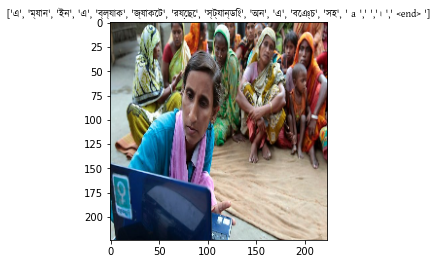

In [29]:
work_image_tensor.float().type()

encoder.eval()
decoder.eval()
validation_image=work_image_tensor.to(device)
validation_image=validation_image.view(1,3,224,224)
features=encoder(validation_image.float())
outputs=sample(features.view(1,1,4096))
output_words=[vocab.idx2word[output] for output in outputs]

sentences = output_words

import six
if isinstance(sentences, six.binary_type):
    sentences = sentences.decode("utf-8")
print(output_words)

from google_trans_new import google_translator  
translator = google_translator()  
result = translator.translate(sentences, lang_src='en', lang_tgt='bn')  



print(result)

plt.figure()
plt.imshow(validation_image[0].cpu().numpy().transpose((1,2,0)))
plt.title(''.join(result[:-1]),fontproperties=prop)
#plt.title(" ".join(output_words[:-1]),fontproperties=prop)
plt.savefig("/content/drive/MyDrive/englishCaption/englishCaptionTest")
#.format(target_folder,count))